Тема “Обучение без учителя Scikit-learn”

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
data = boston.data
target = boston.target
feature_names = boston.feature_names
data.shape

(506, 13)

In [3]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[-2.42537060e+01, -2.28463840e+01],
       [ 7.17482805e+00,  7.25726318e+00],
       [ 1.68165436e+01,  1.48996668e+01],
       [-2.69382744e+01, -3.19683933e+01],
       [ 1.41786957e+00, -3.67929554e+00],
       [ 1.12680092e+01,  9.77778053e+00],
       [ 9.18835545e+00,  9.37094593e+00],
       [ 2.59136963e+01,  1.70560856e+01],
       [-2.80686665e+01, -3.21605682e+01],
       [-2.63405342e+01, -3.47933388e+01],
       [ 9.35723686e+00,  9.97671604e+00],
       [ 9.27700615e+00,  1.89471400e+00],
       [ 1.21004372e+01, -1.35789514e+00],
       [-2.58820114e+01, -3.37761116e+01],
       [ 1.36884794e+01, -9.47273135e-01],
       [ 3.49823266e-01, -6.56317997e+00],
       [ 3.09424615e+00, -1.19344246e+00],
       [ 1.75816784e+01,  1.58780451e+01],
       [ 1.01448746e+01,  1.54896584e+01],
       [ 1.43680334e+01,  1.60122299e+01],
       [-2.70022125e+01, -2.79248867e+01],
       [ 2.94024205e+00,  1.21419513e+00],
       [ 1.27754784e+01,  1.00256891e+01],
       [ 8.

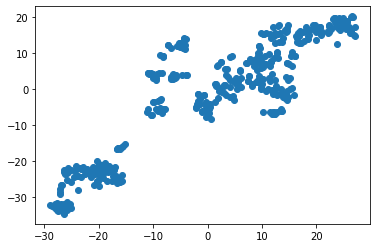

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [14]:
from sklearn.cluster import KMeans

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [65]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42).fit(X_train_scaled)
train_labels = model.fit_predict(X_train_scaled)
model.cluster_centers_
#centers = scaler.inverse_transform(model.cluster_centers_)
#centers

array([[9.83092272e-04, 3.07163121e-01, 1.55912792e-01, 3.54609929e-02,
        1.23144500e-01, 5.44851629e-01, 3.46480560e-01, 4.50556762e-01,
        1.40918902e-01, 2.03454063e-01, 5.27387958e-01, 9.81469221e-01,
        1.55744603e-01],
       [1.45203294e-01, 5.55111512e-17, 6.49895721e-01, 7.76699029e-02,
        5.93311758e-01, 4.42317223e-01, 8.87754592e-01, 8.32317528e-02,
        9.83115238e-01, 9.15789669e-01, 8.08304069e-01, 7.24522825e-01,
        4.64666517e-01],
       [7.83341889e-03, 2.14375000e-02, 4.02333333e-01, 1.00000000e-01,
        4.00475823e-01, 4.94727476e-01, 8.30509784e-01, 1.64399058e-01,
        1.60326087e-01, 2.76979962e-01, 5.50930851e-01, 9.35033127e-01,
        3.11042701e-01]])

(-40, 40)

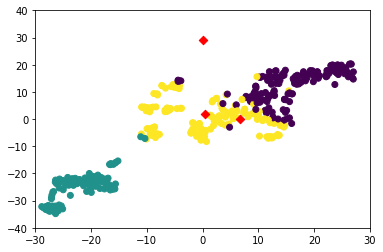

In [64]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(-30,30)
plt.ylim(-40,40)

* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [57]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42).fit(X_test_scaled)
train_labels = model.fit_predict(X_test_scaled)
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[ 1.20165366e-01,  2.56341463e+01,  6.08853659e+00,
         2.43902439e-02,  4.50636585e-01,  6.44502439e+00,
         3.77024390e+01,  5.39562439e+00,  4.21951220e+00,
         2.89658537e+02,  1.80780488e+01,  3.88876098e+02,
         7.65902439e+00],
       [ 1.13891742e+01,  0.00000000e+00,  1.81000000e+01,
        -6.93889390e-18,  6.65225806e-01,  5.92161290e+00,
         9.25032258e+01,  2.10016774e+00,  2.40000000e+01,
         6.66000000e+02,  2.02000000e+01,  2.93974516e+02,
         1.90438710e+01],
       [ 4.12179667e-01,  8.33333333e-01,  1.28840000e+01,
         1.66666667e-01,  5.58600000e-01,  6.01963333e+00,
         8.62900000e+01,  3.18183333e+00,  4.50000000e+00,
         3.60566667e+02,  1.90166667e+01,  3.82782667e+02,
         1.55100000e+01]])

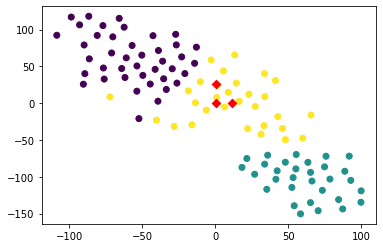

In [58]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')